In [5]:
import sys
sys.path.append('..')

import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datasets.ice import IceWithProposals

In [6]:
data_dir = '../data'
img_scale = .35
img_crop = 220

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_set = IceWithProposals(os.path.join(data_dir, 'imgs'), os.path.join(data_dir, 'binary_masks'),
                  os.path.join(data_dir, 'txt_files'), os.path.join(data_dir, 'proposals/binary_250_16'),
                               'train', img_scale, img_crop)

In [7]:
batch = train_set[0]

In [10]:
batch['image'].shape

torch.Size([3, 220, 220])

In [14]:
m = batch['mask']

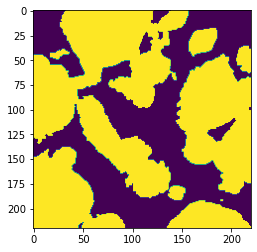

In [15]:
plt.imshow(m.permute(1,2,0).detach().cpu().numpy()[:,:,0]);

In [2]:
num = 1
mask_dir = f'../data/masks/img_{num}.tif'
mask = plt.imread(mask_dir)


In [3]:
mask.shape

(1463, 1462, 4)

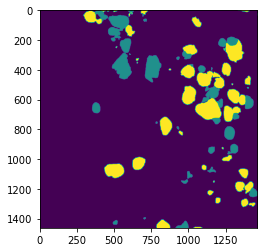

In [9]:
plt.imshow(mask[:,:,1])

In [11]:
np.unique(mask[:,:,0])

array([0, 1, 2], dtype=uint8)

In [16]:
mask_1d = np.zeros_like(mask[:,:,0])
mask_1d[(mask[:,:,0] == 1)] = 1
mask_1d[(mask[:,:,0] == 2)] = 1

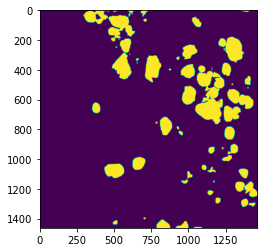

In [17]:
plt.imshow(mask_1d)

In [31]:
im = Image.fromarray(mask_1d)
im.save("test.tif")

In [29]:
x = plt.imread('test.tif')

In [30]:
x.shape

(1463, 1462)

In [32]:
x = Image.open('test.tif')

In [35]:
x.size

(1462, 1463)